In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
def plt_img(bgr_img):
    if bgr_img.shape[2] > 3:
        b,g,r,a = cv2.split(bgr_img)       # get b,g,r
        rgb_img = cv2.merge([r,g,b,a])     # switch it to rgb
    else:
        b,g,r = cv2.split(bgr_img)       # get b,g,r
        rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img, aspect='auto')

In [34]:
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np
def showbytes(a):
    IPython.display.display(IPython.display.Image(data=a))

def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

## Q1

In [35]:
image_11 = cv2.imread('./A1I/Q1I1.png', cv2.IMREAD_COLOR)
# image_11 = cv2.resize(image_11, (0,0), fx=0.3, fy=0.3)

In [36]:
image_12 = cv2.imread('./A1I/Q1I2.jpg', cv2.IMREAD_COLOR)
# image_12 = cv2.resize(image_12, (0,0), fx=0.3, fy=0.3)

In [37]:
def flashbang(alpha, image):
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                a = alpha - (alpha*x/image.shape[1])
                new_image[y,x,c] = np.clip(a*image[y,x,c], 0, 255)            
    return new_image

In [38]:
def translate_image(image, tx, ty):
    rows,cols = image.shape[0], image.shape[1]
    M = np.float32([[1,0,tx],[0,1,ty]])
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

In [39]:
def q1_answer():
    image_11_edited = flashbang(2.6, image_11)
    image_12_edited = np.fliplr(image_12)
    TX = 155
    image_12_edited = translate_image(image_12_edited, TX, 0)
    image_12_edited = cv2.resize(image_12_edited, (image_11.shape[1], image_11.shape[0]))
    return cv2.addWeighted(image_11_edited, 1, image_12_edited, 0.4, 0)

In [40]:
cv2.imwrite('q1.jpg', q1_answer())

True

# Q2

### 1. 

In [46]:
image_2 = cv2.imread('./A1I/Q2I1.jpg', cv2.IMREAD_COLOR)

In [9]:
image_22 = cv2.imread('./A1I/Q2I2.jpg', cv2.IMREAD_COLOR)

In [27]:
def add_alpha_channel(src):
    b, g, r = cv2.split(src)
    a = np.ones(b.shape, dtype=src.dtype) * 255
    return cv2.merge([b, g, r, a])

def offset_affine(src, dst, srcPoints, dstPoints):
    src = add_alpha_channel(src).astype(float) / 255
    dst = add_alpha_channel(dst).astype(float) / 255
    
    warp_mat = cv2.getAffineTransform(srcPoints, dstPoints)
    warp_dst = cv2.warpAffine(src, warp_mat, (dst.shape[1], dst.shape[0]))    
        
    # Get alpha mask
    _, _, _, alpha = cv2.split(warp_dst)
    mask = cv2.merge([alpha, alpha, alpha, alpha])
    
    # Multiply the foreground with the mask
    foreground = cv2.multiply(mask, warp_dst)
    
    # Multiply the background with ( 1 - mask )
    background = cv2.multiply(1.0 - mask, dst)

    # Add the masked foreground and background.
    outImage = cv2.add(foreground, background)
    
    return outImage

In [47]:
def q21_answer():
    h_21, w_21, _ = image_2.shape
    srcPoints = np.float32([[0, 0], [0, h_21], [w_21, h_21]])
    dstPoints = np.float32([[1219, 376], [1219, 376 + 140], [1219 + 90, 376 + 140]])
    dst = offset_affine(image_2, image_22, srcPoints, dstPoints)
    return dst

In [41]:
cv2.imwrite('q2_1.jpg', q21_answer() * 255)

True

### 2. 

In [42]:
image_23 = cv2.imread('./A1I/Q2I3.jpg', cv2.IMREAD_COLOR)
# image_23 = cv2.resize(image_23, (0,0), fx=0.3, fy=0.3)

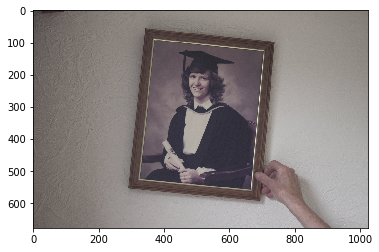

In [43]:
plt_img(image_23)

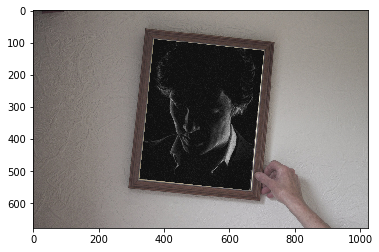

In [98]:
def q22_answer():
    h_21, w_21, _ = image_2.shape
    srcPoints = np.float32([[0, 0], [0, h_21], [w_21, h_21]])
    dstPoints = np.float32([[370, 90], [325, 525], [661, 561]])
    dst = offset_affine(image_2, image_23, srcPoints, dstPoints)
    return dst

plt_img(q22_answer())

In [82]:
cv2.imwrite('q2_2.jpg', q22_answer() * 255)

True

# Q3

In [44]:
image_31 = cv2.imread('./A1I/Q3I1.jpg', cv2.IMREAD_COLOR)
# image_23 = cv2.resize(image_23, (0,0), fx=0.3, fy=0.3)

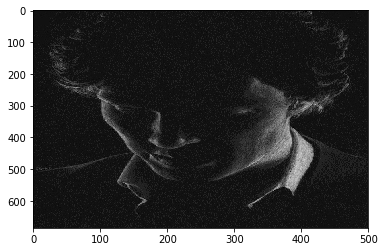

In [48]:
plt_img(image_2)

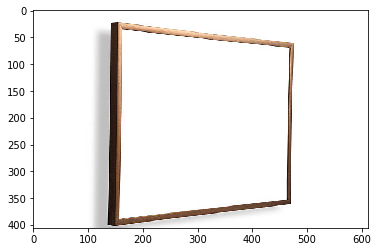

In [49]:
plt_img(image_31)

In [55]:
def offset_perspective(src, dst, srcPoints, dstPoints):
    src = add_alpha_channel(src).astype(float) / 255
    dst = add_alpha_channel(dst).astype(float) / 255
    
    warp_mat = cv2.getPerspectiveTransform(srcPoints, dstPoints)
    warp_dst = cv2.warpPerspective(src, warp_mat, (dst.shape[1], dst.shape[0]))    
        
    # Get alpha mask
    _, _, _, alpha = cv2.split(warp_dst)
    mask = cv2.merge([alpha, alpha, alpha, alpha])
    
    # Multiply the foreground with the mask
    foreground = cv2.multiply(mask, warp_dst)
    
    # Multiply the background with ( 1 - mask )
    background = cv2.multiply(1.0 - mask, dst)

    # Add the masked foreground and background.
    outImage = cv2.add(foreground, background)
    
    return outImage

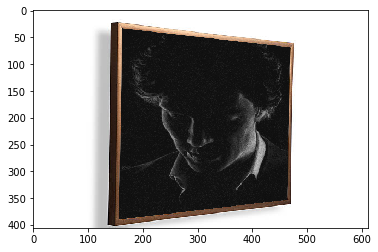

In [75]:
def q3_answer():
    h_21, w_21, _ = image_2.shape
    srcPoints = np.float32([[0, 0], [0, h_21], [w_21, 0], [w_21, h_21]])
    dstPoints = np.float32([[163, 34], [157, 390], [469, 69], [464, 353]])
    dst = offset_perspective(image_2, image_31, srcPoints, dstPoints)
    return dst

plt_img(q3_answer())

In [76]:
cv2.imwrite('q3.jpg', q3_answer() * 255)

True